In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

hate_crime_file = "Resources/hate_crime.csv"
hate_crime_df = pd.read_csv(hate_crime_file,low_memory=False)

In [2]:
unfiltered_bias = list(hate_crime_df["BIAS_DESC"])
unique_bias = set()

for bias in unfiltered_bias:
    list_of_bias = bias.split(';')
    
    for split in list_of_bias:
        unique_bias.add(split)

In [3]:
religion = list(['Anti-Atheism/Agnosticism','Anti-Buddhist','Anti-Catholic','Anti-Eastern Orthodox (Russian, Greek, Other)','Anti-Hindu','Anti-Islamic (Muslim)',"Anti-Jehovah's Witness",'Anti-Jewish','Anti-Mormon','Anti-Multiple Religions, Group','Anti-Other Christian','Anti-Other Religion','Anti-Protestan','Anti-Sikh'])

sexuality = list(['Anti-Bisexual','Anti-Gay (Male)','Anti-Heterosexual','Anti-Lesbian (Female)','Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)'])

gender = list(['Anti-Female','Anti-Gender Non-Conforming','Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)','Anti-Male','Anti-Transgender'])

race = list(['Anti-American Indian or Alaska Native','Anti-Arab','Anti-Asian','Anti-Black or African American','Anti-Eastern Orthodox (Russian, Greek, Other)','Anti-Hispanic or Latino','Anti-Multiple Races, Group','Anti-Native Hawaiian or Other Pacific Islander','Anti-Other Race/Ethnicity/Ancestry','Anti-White'])

In [4]:
columns = ['INCIDENT_ID', 'DATA_YEAR', 'INCIDENT_DATE', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME',
           'STATE_ABBR', 'STATE_NAME', 'POPULATION_GROUP_DESC', 'TOTAL_OFFENDER_COUNT',
           'TOTAL_INDIVIDUAL_VICTIMS', 'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES']

reduced_hate_crime_df = hate_crime_df.loc[:,  columns]

reduced_hate_crime_2009_df = reduced_hate_crime_df.loc[(reduced_hate_crime_df['DATA_YEAR'] == 2009)]
reduced_hate_crime_2017_df = reduced_hate_crime_df.loc[(reduced_hate_crime_df['DATA_YEAR'] == 2017)]

hate_crimes_2009 = list(reduced_hate_crime_2009_df['BIAS_DESC'])
hate_crimes_2017 = list(reduced_hate_crime_2017_df['BIAS_DESC'])

# filtering hate crime data for 2009 and 2017
# THIS IS A COMPLETELY DIFFERENT METHOD THAN THE PREVIOUS WAY I HAD IT... 
# SOME WEIRD STUFF WAS HAPPENING SO I COMPLETELY RE-DID IT...

#initialize 2009 
religion_count = []
sexuality_count = []
race_count = []
gender_count = []

#initualize 2017
religion_count1 = []
sexuality_count1 = []
race_count1 = []
gender_count1 = []

for sex in sexuality:
    sexuality_count.append(hate_crimes_2009.count(sex))
    sexuality_count1.append(hate_crimes_2017.count(sex))
    
for rel in religion:
    religion_count.append(hate_crimes_2009.count(rel))
    religion_count1.append(hate_crimes_2017.count(rel))
    
for rac in race:
    race_count.append(hate_crimes_2009.count(rac))
    race_count1.append(hate_crimes_2017.count(rac))
    
for gen in gender:
    gender_count.append(hate_crimes_2009.count(gen))
    gender_count1.append(hate_crimes_2017.count(gen))
    
religion_total_2009 = sum(religion_count)
sexuality_total_2009 = sum(sexuality_count)
race_total_2009 = sum(race_count)
gender_total_2009 = sum(gender_count)

religion_total_2017 = sum(religion_count1)
sexuality_total_2017 = sum(sexuality_count1)
race_total_2017 = sum(race_count1)
gender_total_2017 = sum(gender_count1)

print(religion_total_2017,sexuality_total_2017,race_total_2017,gender_total_2017)
        

1559 1146 4209 452


In [5]:
print(f"The number of race bias hate crimes in 2009 is {race_total_2009} \nThe number of gender bias hate crimes in 2009 is {gender_total_2009} \nThe number of religious bias hate crimes in 2009 is {religion_total_2009} \nThe number of sexuality bias hate crimes in 2009 is {sexuality_total_2009}")

The number of race bias hate crimes in 2009 is 3988 
The number of gender bias hate crimes in 2009 is 310 
The number of religious bias hate crimes in 2009 is 1260 
The number of sexuality bias hate crimes in 2009 is 1226


In [6]:
print(f"The number of race bias hate crimes in 2017 is {race_total_2017} \nThe number of gender bias hate crimes in 2017 is {gender_total_2017} \nThe number of religious bias hate crimes in 2017 is {religion_total_2017} \nThe number of sexuality bias hate crimes in 2017 is {sexuality_total_2017}")

The number of race bias hate crimes in 2017 is 4209 
The number of gender bias hate crimes in 2017 is 452 
The number of religious bias hate crimes in 2017 is 1559 
The number of sexuality bias hate crimes in 2017 is 1146


In [7]:
# intitaial observation: every type has gone up by about 200

In [8]:
# THIS IS THE MASSIVE CELL OF CODE THAT BREAKS DOWN THE TOTAL OF EACH TYPE OF HATE CRIME PER STATE

states = list(reduced_hate_crime_2009_df['STATE_NAME'].unique())
hate_crimes_2009 = list(reduced_hate_crime_2009_df['BIAS_DESC'])
reduced_hate_crime_2009_df = reduced_hate_crime_df.loc[(reduced_hate_crime_df['DATA_YEAR'] == 2009)]

state_by_state_count_2009 = []

state_by_state_count_2017 = []

for state in states:
    state_crime_data_2009 = reduced_hate_crime_df[(reduced_hate_crime_df['DATA_YEAR'] == 2009)&(reduced_hate_crime_2009_df['STATE_NAME']==state)]
    state_hate_crimes_2009 = list(state_crime_data_2009['BIAS_DESC'])
    
    state_crime_data_2017 = reduced_hate_crime_df[(reduced_hate_crime_df['DATA_YEAR'] == 2017)&(reduced_hate_crime_2017_df['STATE_NAME']==state)]
    state_hate_crimes_2017 = list(state_crime_data_2017['BIAS_DESC'])
    
    total_count_2009 = len(state_hate_crimes_2009)
    total_count_2017 = len(state_hate_crimes_2017)
    
    #2009
    religion_count2 = []
    sexuality_count2 = []
    race_count2 = []
    gender_count2 = []
    
    #2017
    religion_count3 = []
    sexuality_count3 = []
    race_count3 = []
    gender_count3 = []
    
    #initialize total counts
    race_state_total_2009 = 0
    religion_state_total_2009 = 0
    sexuality_state_total_2009 = 0
    gender_state_total_2009 = 0
    
    for sex in sexuality:
        sexuality_count2.append(state_hate_crimes_2009.count(sex))
        sexuality_count3.append(state_hate_crimes_2017.count(sex))

    for rel in religion:
        religion_count2.append(state_hate_crimes_2009.count(rel))
        religion_count3.append(state_hate_crimes_2017.count(rel))

    for rac in race:
        race_count2.append(state_hate_crimes_2009.count(rac))
        race_count3.append(state_hate_crimes_2017.count(rac))

    for gen in gender:
        gender_count2.append(state_hate_crimes_2009.count(gen))
        gender_count3.append(state_hate_crimes_2017.count(gen))
        
    race_state_total_2009 = sum(race_count2)
    religion_state_total_2009 = sum(religion_count2)
    sexuality_state_total_2009 = sum(sexuality_count2)
    gender_state_total_2009 = sum(gender_count2)
    
    race_state_total_2017 = sum(race_count3)
    religion_state_total_2017 = sum(religion_count3)
    sexuality_state_total_2017 = sum(sexuality_count3)
    gender_state_total_2017 = sum(gender_count3)
    
    crime_count_2009 = {
        'Gender Related Incidents':gender_state_total_2009,
        'Sexuality Related Incidents':sexuality_state_total_2009,
        'Religion Related Incidents':religion_state_total_2009,
        'Race Related Incidents':race_state_total_2009,
        'State':state,
        'Total Hate Crimes':total_count_2009
    }
    
    crime_count_2017 = {
        'Gender Related Incidents':gender_state_total_2017,
        'Sexuality Related Incidents':sexuality_state_total_2017,
        'Religion Related Incidents':religion_state_total_2017,
        'Race Related Incidents':race_state_total_2017,
        'State':state,
        'Total Hate Crimes':total_count_2017
    }
    
    # so theses are a list of dictionaries with each dictionary 
    # being the state and the count of each type of hate crime we're analyzing
    
    state_by_state_count_2009.append(crime_count_2009)
    
    state_by_state_count_2017.append(crime_count_2017)
    


In [9]:
# THIS IS THE 2009 DATA FRAME

# making it into a df was much easier than expected
state_by_state_count_2009_df = pd.DataFrame(state_by_state_count_2009)

# the columns were in a weird order so I reordered them
state_by_state_count_2009_df = state_by_state_count_2009_df[['State','Race Related Incidents','Religion Related Incidents','Sexuality Related Incidents','Gender Related Incidents','Total Hate Crimes']].sort_values('Total Hate Crimes',ascending = False)

# here it is!  California is so full of hatred! lol
state_by_state_count_2009_df

,State,Race Related Incidents,Religion Related Incidents,Sexuality Related Incidents,Gender Related Incidents,Total Hate Crimes
4,California,597,191,222,84,1018
33,New York,234,286,117,9,641
30,New Jersey,271,208,66,9,549
18,Massachusetts,189,58,67,0,317
21,Michigan,220,27,62,19,315
34,Ohio,177,25,48,23,303
3,Arizona,127,49,41,5,219
5,Colorado,162,14,28,13,208
46,Washington,145,26,36,9,208
6,Connecticut,126,43,27,10,200


In [10]:
# THIS IS THE 2017 DATA FRAME

# making it into a df was much easier than expected
state_by_state_count_2017_df = pd.DataFrame(state_by_state_count_2017)

# the columns were in a weird order so I reordered them
state_by_state_count_2017_df = state_by_state_count_2017_df[['State','Race Related Incidents','Religion Related Incidents','Sexuality Related Incidents','Gender Related Incidents','Total Hate Crimes']].sort_values('Total Hate Crimes',ascending = False)

# here it is!  California is so full of hatred! lol
state_by_state_count_2017_df.head()

,State,Race Related Incidents,Religion Related Incidents,Sexuality Related Incidents,Gender Related Incidents,Total Hate Crimes
4,California,602,200,247,78,1094
33,New York,189,284,65,20,554
46,Washington,328,85,73,72,511
30,New Jersey,261,180,52,9,499
21,Michigan,312,71,59,36,457


In [11]:
import pandas as pd

low_memory=False

# file and import as df
election_file = "Resources/1976-2016-president.csv"
election_df = pd.read_csv(election_file)
election_data_2008 = election_df.drop(columns = ['notes','version','writein','office','state_ic','state_cen','state_fips','state_po'])

# getting the data I want to work with
election_data_2008 = election_df[(election_df['year']==2008)&((election_df['candidate']=='McCain, John')|(election_df['candidate']=='Obama, Barack H.'))]
election_data_2008 = election_data_2008.drop(columns = ['notes','version','writein','office','state_ic','state_cen','state_fips','state_po'])

# total votes in 2008
totalvotes_2008 = list(election_data_2008['totalvotes'].unique())

# list of every state
states = list(election_data_2008['state'].unique())

# all the republican and democret votes for each state in order for 2008 and 2016
republican_votes_2008 = list(election_data_2008[(election_data_2008['party']=='republican')&(election_data_2008['candidatevotes']>=5000)]['candidatevotes'])
democrat_votes_2008 = list(election_data_2008[(election_data_2008['party']=='democrat')&(election_data_2008['candidatevotes']>=5000)]['candidatevotes'])

# dictionary for my data frame
election_dict_2008 = {
    "State":states,
    "Republican Votes 2008":republican_votes_2008,
    "Democrat Votes 2008":democrat_votes_2008,
    "Total Votes 2008":totalvotes_2008,
}

clean_election_data_2008 = pd.DataFrame.from_dict(election_dict_2008)

# getting the percentage of republican votes and democrat votes for each year

# initialize all the lists for percents
republican_percent_2008 = []
democrat_percent_2008 = []

# for loop for all the percentages
for i in range(51):
    republican_percent_2008.append(round((republican_votes_2008[i]/totalvotes_2008[i])*100,2))
    democrat_percent_2008.append(round((democrat_votes_2008[i]/totalvotes_2008[i])*100,2))


# add all my sick new data to my clean data frame
clean_election_data_2008['Republican Vote Percentage 2008'] = republican_percent_2008
clean_election_data_2008['Democrat Vote Percentage 2008'] = democrat_percent_2008

state_politics_2008 = []

for i in range(51):
    if (republican_percent_2008[i] > democrat_percent_2008[i]):
        if (republican_percent_2008[i] >= 60):
            state_politics_2008.append("Hard Right")
        else:
            state_politics_2008.append("Middle Right")
            
    if (republican_percent_2008[i] < democrat_percent_2008[i]):
        if (democrat_percent_2008[i] >= 60):
            state_politics_2008.append("Hard Left")
        else:
            state_politics_2008.append("Middle Left")

clean_election_data_2008.insert(loc=1, column='Voting Affiliation 2008', value=state_politics_2008)

voting_aff_df = clean_election_data_2008[['State','Voting Affiliation 2008']]

In [66]:
crime_politics_merge_2009_df = pd.merge(voting_aff_df,state_by_state_count_2009_df, on = 'State').sort_values('Total Hate Crimes',ascending = False).reset_index()


voting_aff_df1 = clean_election_data_2016[['State','Voting Affiliation 2016']]

In [67]:
crime_politics_merge_2017_df = pd.merge(voting_aff_df1,state_by_state_count_2017_df, on = 'State').sort_values('Total Hate Crimes',ascending = False).reset_index()
crime_politics_merge_2017_df = crime_politics_merge_2017_df.rename(columns = {'Voting Affiliation 2008':'Voting Affiliation 2017'})
crime_politics_merge_2017_df.head(10)

,index,State,Voting Affiliation 2016,Race Related Incidents,Religion Related Incidents,Sexuality Related Incidents,Gender Related Incidents,Total Hate Crimes
0,4,California,Hard Left,602,200,247,78,1094
1,31,New York,Middle Left,189,284,65,20,554
2,46,Washington,Middle Left,328,85,73,72,511
3,29,New Jersey,Middle Left,261,180,52,9,499
4,21,Michigan,Middle Right,312,71,59,36,457
5,20,Massachusetts,Middle Left,208,116,60,25,434
6,34,Ohio,Middle Right,261,33,53,17,386
7,16,Kentucky,Hard Right,285,36,26,28,378
8,2,Arizona,Middle Right,142,35,50,5,264
9,8,District of Columbia,Hard Left,109,14,57,18,194


In [68]:
# analysis idea: what is the percentage of hate crimes that occur in republican states vs democrat states

In [69]:
import pandas as pd

low_memory=False

# file and import as df
election_file = "Resources/1976-2016-president.csv"
election_df = pd.read_csv(election_file)
election_data_2016 = election_df.drop(columns = ['notes','version','writein','office','state_ic','state_cen','state_fips','state_po'])

# getting the data I want to work with
election_data_2016 = election_df[(election_df['year']==2016)&((election_df['candidate']=='Trump, Donald J.')|(election_df['candidate']=='Clinton, Hillary'))]
election_data_2016 = election_data_2016.drop(columns = ['notes','version','writein','office','state_ic','state_cen','state_fips','state_po'])

# total votes in 2016
totalvotes_2016 = list(election_data_2016['totalvotes'].unique())

# list of every state
states = list(election_data_2016['state'].unique())

# all the republican and democret votes for each state in order for 2016 and 2016
republican_votes_2016 = list(election_data_2016[(election_data_2016['party']=='republican')&(election_data_2016['candidatevotes']>=5000)]['candidatevotes'])
democrat_votes_2016 = list(election_data_2016[(election_data_2016['party']=='democrat')&(election_data_2016['candidatevotes']>=5000)]['candidatevotes'])

# dictionary for my data frame
election_dict_2016 = {
    "State":states,
    "Republican Votes 2016":republican_votes_2016,
    "Democrat Votes 2016":democrat_votes_2016,
    "Total Votes 2016":totalvotes_2016,
}

clean_election_data_2016 = pd.DataFrame.from_dict(election_dict_2016)

# getting the percentage of republican votes and democrat votes for each year

# initialize all the lists for percents
republican_percent_2016 = []
democrat_percent_2016 = []

# for loop for all the percentages
for i in range(51):
    republican_percent_2016.append(round((republican_votes_2016[i]/totalvotes_2016[i])*100,2))
    democrat_percent_2016.append(round((democrat_votes_2016[i]/totalvotes_2016[i])*100,2))


# add all my sick new data to my clean data frame
clean_election_data_2016['Republican Vote Percentage 2016'] = republican_percent_2016
clean_election_data_2016['Democrat Vote Percentage 2016'] = democrat_percent_2016

state_politics_2016 = []

for i in range(51):
    if (republican_percent_2016[i] > democrat_percent_2016[i]):
        if (republican_percent_2016[i] >= 60):
            state_politics_2016.append("Hard Right")
        else:
            state_politics_2016.append("Middle Right")
            
    if (republican_percent_2016[i] < democrat_percent_2016[i]):
        if (democrat_percent_2016[i] >= 60):
            state_politics_2016.append("Hard Left")
        else:
            state_politics_2016.append("Middle Left")

clean_election_data_2016.insert(loc=1, column='Voting Affiliation 2016', value=state_politics_2016)




In [70]:
#getting the democrat voter percentage for later graphs
dem_vote_percentage = clean_election_data_2016[['State','Democrat Vote Percentage 2016']]

crime_politics_merge_2017_df

,index,State,Voting Affiliation 2016,Race Related Incidents,Religion Related Incidents,Sexuality Related Incidents,Gender Related Incidents,Total Hate Crimes
0,4,California,Hard Left,602,200,247,78,1094
1,31,New York,Middle Left,189,284,65,20,554
2,46,Washington,Middle Left,328,85,73,72,511
3,29,New Jersey,Middle Left,261,180,52,9,499
4,21,Michigan,Middle Right,312,71,59,36,457
5,20,Massachusetts,Middle Left,208,116,60,25,434
6,34,Ohio,Middle Right,261,33,53,17,386
7,16,Kentucky,Hard Right,285,36,26,28,378
8,2,Arizona,Middle Right,142,35,50,5,264
9,8,District of Columbia,Hard Left,109,14,57,18,194


In [71]:
# CENSUS INFORMATION IMPRORT
# Census imports for 2017.

from census import Census

# Census API Key
# Data not available for 2010 0r 2011.
api_key = "e2279f55460bc9ac040255854c51727e216b16c0"
c = Census(api_key, year=2017)
#c.acs5.tables()

# Run Census Search to retrieve data on all states

census_data = c.acs5.get(("NAME", "B19013_001E", "B19301_001E", "B23025_005E", "B23025_002E",
                          "B17001_002E", "B17001_003E", "B17001_017E",
                          "B17001A_002E", "B17001B_002E", "B01003_001E",
                          "B02001_002E", "B02001_003E", "B15003_017E", "B15003_022E"), {'for': 'state:*'})

census_df = pd.DataFrame(census_data)

census_df = census_df.rename(columns={"B19301_001E": "Per Capita Income",
                                      "B19013_001E": "Median Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B23025_002E": "Labor Force Size",
                                      "B17001_002E": "Poverty Count",
                                      "B17001_003E": "Poverty: Male",
                                      "B17001_017E": "Poverty: Female",
                                      "B17001A_002E": "Poverty: White",
                                      "B17001B_002E": "Poverty: Black",
                                      "B01003_001E": "Total Population",
                                      "B02001_002E": "Population: White",
                                      "B02001_003E": "Population: Black",
                                      "B15003_017E": "Education: High School",
                                      "B15003_022E": "Education: Bachelors",
                                      "NAME": "State", "state": "State Number"})

# Calculate & add in Poverty Rate (Poverty Count / Population)
census_df["Poverty Rate"] = 100 * \
    census_df["Poverty Count"].astype(
        int) / census_df["Total Population"].astype(int)

# Calculate & add in Unemployment Rate (Unemployment Count / Labor Force)
census_df["Unemployment Rate"] = 100 * \
    census_df["Unemployment Count"].astype(
        int) / census_df["Labor Force Size"].astype(int)

# Calculate and add share of population with at least a high school diploma.
census_df['Share of Population with HS Diploma'] = 1 - \
    census_df['Education: High School'].astype(
        int) / census_df['Total Population'].astype(int)

census_df = census_df[["State", "Total Population"]]

census_df.head()



,State,Total Population
0,Puerto Rico,3468963.0
1,Alabama,4850771.0
2,Alaska,738565.0
3,Arizona,6809946.0
4,Arkansas,2977944.0


In [73]:
big_df = pd.merge(crime_politics_merge_2017_df,census_df, on = 'State')
politics_df = big_df[['State','Voting Affiliation 2016','Total Population','Race Related Incidents','Religion Related Incidents','Sexuality Related Incidents','Gender Related Incidents','Total Hate Crimes']]

In [102]:
df69 = pd.read_csv("Resources/hate_crime_socioeconomic_2017.csv")
hate_crime_rat = df69[['State','Hate Crime Rate']]
hate_crime_rate = hate_crime_rat.rename(columns = {'Hate Crime Rate':'Hate Crimes per 100,000'})
data_df = pd.merge(politics_df,hate_crime_rate,on = "State",how = 'left').sort_values('Hate Crimes per 100,000',ascending = False)
more_data_df = pd.merge(dem_vote_percentage,data_df[(data_df['State']!='District of Columbia')&(data_df['State']!='Kentucky')],on = "State").sort_values('Hate Crimes per 100,000',ascending = False)
#data_df.to_excel('DataByRate2017.xls')
data_df1 = data_df.sort_values('Total Hate Crimes', ascending = False)
#data_df1.to_excel('DataByTotal2017.xls')
data_df1.head()

,State,Voting Affiliation 2016,Total Population,Race Related Incidents,Religion Related Incidents,Sexuality Related Incidents,Gender Related Incidents,Total Hate Crimes,"Hate Crimes per 100,000"
0,California,Hard Left,38982847.0,602,200,247,78,1094,2.830222
1,New York,Middle Left,19798228.0,189,284,65,20,554,2.812546
2,Washington,Middle Left,7169967.0,328,85,73,72,511,7.224508
3,New Jersey,Middle Left,8960161.0,261,180,52,9,499,5.597022
4,Michigan,Middle Right,9925568.0,312,71,59,36,457,4.611690


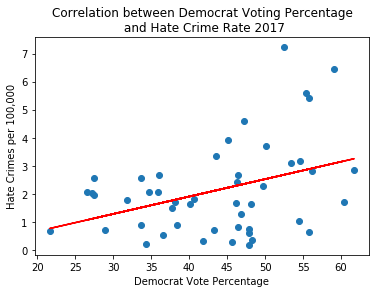

In [75]:
fig, ax = plt.subplots()

x_axis = np.array(more_data_df['Democrat Vote Percentage 2016'])
y_axis = np.array(more_data_df['Hate Crimes per 100,000'])
ax.plot(x_axis,y_axis, linewidth = 0,marker = 'o')
plt.ylabel("Hate Crimes per 100,000")
plt.xlabel("Democrat Vote Percentage")
plt.title("Correlation between Democrat Voting Percentage\n and Hate Crime Rate 2017")

(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

ax.plot(x_axis,fit,'r-')
plt.savefig('Resources/DemVotingVsHateCrimeRate')
#Removed are Kentucky and Washington DC as they are outliers

In [76]:
# very subtle positive correlation between dem votes and hate crimes


In [79]:
dem_filter_df = politics_df[(politics_df['Voting Affiliation 2016']=='Hard Left')|(politics_df['Voting Affiliation 2016']=='Middle Left')]
dem_total_pop = sum(list(dem_filter_df['Total Population']))
dem_total_crime = sum(list(dem_filter_df['Total Hate Crimes']))
dem_crime_rate = (dem_total_crime/dem_total_pop)*100000
dem_crime_rate

3.099091779686151

In [80]:
rep_filter_df = politics_df[(politics_df['Voting Affiliation 2016']=='Hard Right')|(politics_df['Voting Affiliation 2016']=='Middle Right')]
rep_total_pop = sum(list(rep_filter_df['Total Population']))
rep_total_crime = sum(list(rep_filter_df['Total Hate Crimes']))
rep_crime_rate = (rep_total_crime/rep_total_pop)*100000
rep_crime_rate

1.6805807716259948

In [81]:
dem_rate_perc = (dem_crime_rate/(dem_crime_rate+rep_crime_rate))*100
rep_rate_perc = (rep_crime_rate/(dem_crime_rate+rep_crime_rate))*100
pie_data_2017 = [dem_rate_perc,rep_rate_perc]

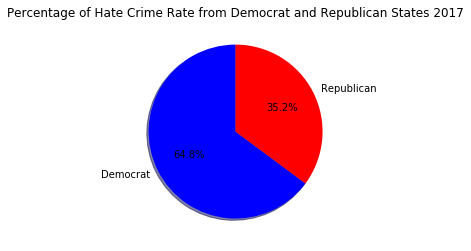

In [82]:
labels = ['Democrat','Republican']
plt.pie(pie_data_2017,labels = labels,colors=['b','r'],autopct= "%1.1f%%",shadow = True, startangle = 90)
plt.title('Percentage of Hate Crime Rate from Democrat and Republican States 2017')
plt.savefig('PercHCR2017')

In [83]:
crime_politics_merge_2009_df.head()

from census import Census

# Census API Key
# Data not available for 2010 0r 2011.
api_key = "e2279f55460bc9ac040255854c51727e216b16c0"
c = Census(api_key, year=2009)
#c.acs5.tables()

# Run Census Search to retrieve data on all states

census_data = c.acs5.get(("NAME","B01003_001E"), {'for': 'state:*'})

census_df = pd.DataFrame(census_data)

census_df = census_df.rename(columns={"B01003_001E": "Total Population","NAME": "State", "state": "State Number"})

census_df = census_df[["State", "Total Population"]]

census_df.head()

state_by_state_count_2009_df.head()

politics_df2 = pd.merge(census_df,state_by_state_count_2009_df,on = 'State')
politics_df1 = pd.merge(voting_aff_df,politics_df2,on='State')

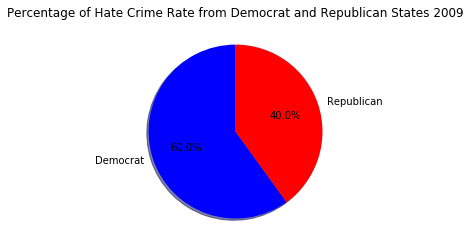

In [84]:
dem_filter_df1 = politics_df1[(politics_df1['Voting Affiliation 2008']=='Hard Left')|(politics_df1['Voting Affiliation 2008']=='Middle Left')]
dem_total_pop1 = sum(list(dem_filter_df1['Total Population']))
dem_total_crime1 = sum(list(dem_filter_df1['Total Hate Crimes']))
dem_crime_rate1 = (dem_total_crime1/dem_total_pop1)*100000
dem_crime_rate1
rep_filter_df1 = politics_df1[(politics_df1['Voting Affiliation 2008']=='Hard Right')|(politics_df1['Voting Affiliation 2008']=='Middle Right')]
rep_total_pop1 = sum(list(rep_filter_df1['Total Population']))
rep_total_crime1 = sum(list(rep_filter_df1['Total Hate Crimes']))
rep_crime_rate1 = (rep_total_crime1/rep_total_pop1)*100000
rep_crime_rate1
dem_rate_perc1 = (dem_crime_rate1/(dem_crime_rate1+rep_crime_rate1))*100
rep_rate_perc1 = (rep_crime_rate1/(dem_crime_rate1+rep_crime_rate1))*100
pie_data_2009 = [dem_rate_perc1,rep_rate_perc1]
labels = ['Democrat','Republican']
plt.pie(pie_data_2009,labels = labels,colors=['b','r'],autopct= "%1.1f%%",shadow = True, startangle = 90)
plt.title('Percentage of Hate Crime Rate from Democrat and Republican States 2009')
plt.savefig('PercHCR2009')

In [85]:
#CORRELATION FOR 2009


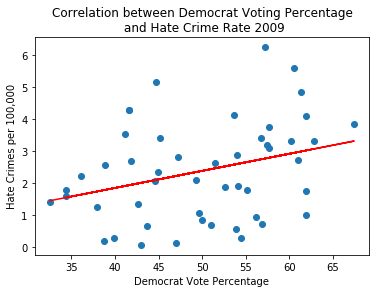

In [86]:
dem_vote_perc_2008 = clean_election_data_2008[['State','Democrat Vote Percentage 2008']]
df70 = pd.read_csv('Resources/hate_crime_socioeconomic_2009.csv')
hate_crime_rat1 = df70[['State','Hate Crime Rate']]
corr_data = pd.merge(dem_vote_perc_2008,hate_crime_rat1, on = "State")
corr_data1 = corr_data[(corr_data['State']!='District of Columbia')]
x_axis1 = np.array(corr_data1['Democrat Vote Percentage 2008'])
y_axis1 = np.array(corr_data1['Hate Crime Rate'])

len(x_axis1)

# Correlation 2009
fig1, ax1 = plt.subplots()


ax1.plot(x_axis1,y_axis1, linewidth = 0,marker = 'o')
plt.ylabel("Hate Crimes per 100,000")
plt.xlabel("Democrat Vote Percentage")
plt.title("Correlation between Democrat Voting Percentage\n and Hate Crime Rate 2009")

(slope1, intercept1, _, _, _) = linregress(x_axis1, y_axis1)
fit1 = slope1 * x_axis1 + intercept1

ax1.plot(x_axis1,fit1,'r-')
plt.savefig('Resources/DemVotingVsHateCrimeRate09')
#Removed is Washington DC as it is an outlier

In [115]:
#politics_df1.head()
rate09 = list(corr_data['Hate Crime Rate'])
politics_df1['Hate Crime Rate']=rate09
data_by_total_2009 = politics_df1.sort_values('Total Hate Crimes',ascending = False)
data_by_rate_2009 = politics_df1.sort_values('Hate Crime Rate',ascending = False)
data_by_total_2009.to_excel('DataByTotal2009.xls')
data_by_rate_2009.to_excel('DataByRate2009.xls')

In [88]:
# percent change in hate crimes by number 2009-2017

total_crime_2017 = sum(list(politics_df['Total Hate Crimes']))
total_crime_2009 = sum(list(politics_df1['Total Hate Crimes']))
((total_crime_2017 - total_crime_2009)/total_crime_2009)*100

10.919540229885058

In [121]:
#investigate changes in Indiana, Michigan, Ohio, and Wisconsin 
significant_states = ['Indiana','Michigan','North Carolina','Ohio','Pennsylvania']
change_states_2017 = politics_df[politics_df['State'].apply(lambda row: row in significant_states)].sort_values('State')
change_states_2009 = politics_df1[politics_df1['State'].apply(lambda row: row in significant_states)].sort_values('State')
change_states_2009

,State,Voting Affiliation 2008,Total Population,Race Related Incidents,Religion Related Incidents,Sexuality Related Incidents,Gender Related Incidents,Total Hate Crimes,Hate Crime Rate
13,Indiana,Middle Left,6342469.0,35,8,12,0,55,0.848042
21,Michigan,Middle Left,10039208.0,220,27,62,19,315,3.182698
32,North Carolina,Middle Left,9045705.0,79,8,15,5,103,1.079184
34,Ohio,Middle Left,11511858.0,177,25,48,23,303,2.627116
37,Pennsylvania,Middle Left,12516596.0,26,7,2,0,36,0.283474


In [122]:
change_states_2017

,State,Voting Affiliation 2016,Total Population,Race Related Incidents,Religion Related Incidents,Sexuality Related Incidents,Gender Related Incidents,Total Hate Crimes
20,Indiana,Middle Right,6614418.0,59,20,16,8,98
4,Michigan,Middle Right,9925568.0,312,71,59,36,457
12,North Carolina,Middle Right,10052564.0,112,24,24,2,166
6,Ohio,Middle Right,11609756.0,261,33,53,17,386
25,Pennsylvania,Middle Right,12790505.0,51,17,5,2,75


In [123]:
change_in_affiliation = ['Democrat to Republican','Democrat to Republican','Democrat to Republican','Democrat to Republican','Democrat to Republican']
race9=list(change_states_2009['Race Related Incidents'])
religion9=list(change_states_2009['Religion Related Incidents'])
sex9=list(change_states_2009['Sexuality Related Incidents'])
gender9=list(change_states_2009['Gender Related Incidents'])

race17=list(change_states_2017['Race Related Incidents'])
religion17=list(change_states_2017['Religion Related Incidents'])
sex17=list(change_states_2017['Sexuality Related Incidents'])
gender17=list(change_states_2017['Gender Related Incidents'])

race_change = []
religion_change = []
sex_change = []
gender_change = []

for i in range(len(race9)):
    race_change.append(race17[i]-race9[i])
    religion_change.append(religion17[i]-religion9[i])
    sex_change.append(sex17[i]-sex9[i])
    gender_change.append(gender17[i]-gender9[i])
    
dict2 = {
    'State':list(change_states_2017['State']),
    'Political Change':change_in_affiliation,
    'Hate Crime Change: Race':race_change,
    'Hate Crime Change: Religion':religion_change,
    'Hate Crime Change: Sexuality':sex_change,
    'Hate Crime Change: Gender':gender_change
}

significant_states_change_df = pd.DataFrame(dict2)

In [124]:
significant_states_change_df

,State,Political Change,Hate Crime Change: Race,Hate Crime Change: Religion,Hate Crime Change: Sexuality,Hate Crime Change: Gender
0,Indiana,Democrat to Republican,24,12,4,8
1,Michigan,Democrat to Republican,92,44,-3,17
2,North Carolina,Democrat to Republican,33,16,9,-3
3,Ohio,Democrat to Republican,84,8,5,-6
4,Pennsylvania,Democrat to Republican,25,10,3,2
